# Exploratory Data Analysis

## Import data

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from neuralNetwork import NeuralNetwork

In [19]:
data = np.loadtxt('mlp_train.txt')
df = pd.DataFrame(data).rename(columns={0:'x1',1:'x2',2:'y'})
df.head()

,x1,x2,y
0,0.459861,-2.196528,-0.991458
1,-0.740200,0.780350,0.333378
2,0.555866,-0.750616,-0.743051
3,0.747876,0.184974,2.320633
4,-1.028215,0.780350,1.244204


## Analyzing Data

In [20]:
df.describe()

,x1,x2,y
count,1771.000000,1771.000000,1771.000000
mean,0.000084,-0.008521,0.001141
std,0.994831,1.006813,1.011010
min,-2.132271,-2.366636,-0.991458
25%,-0.788203,-0.665562,-0.743051
50%,0.171846,0.184974,-0.411842
75%,0.795878,0.780350,0.581785
max,1.515915,1.545833,3.811075


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1771 non-null   float64
 1   x2      1771 non-null   float64
 2   y       1771 non-null   float64
dtypes: float64(3)
memory usage: 41.6 KB


## Plotting data

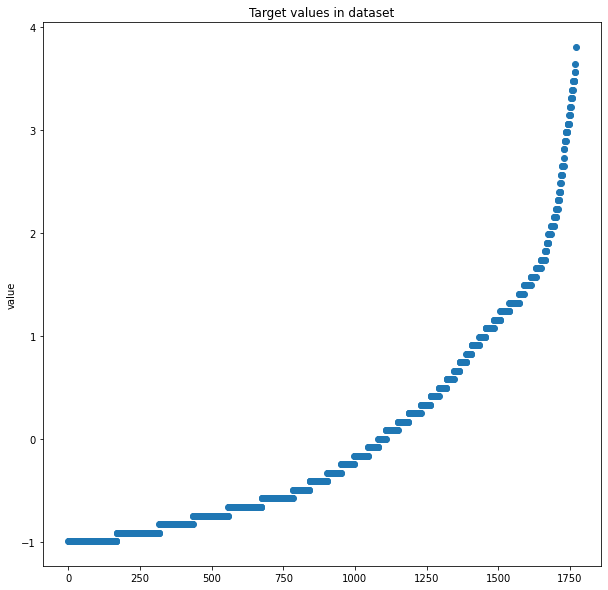

In [22]:
plt.figure(figsize=(10,10))
plt.title('Target values in dataset')
plt.ylabel('value')
plt.scatter(df.index,df['y'].sort_values())
plt.show()

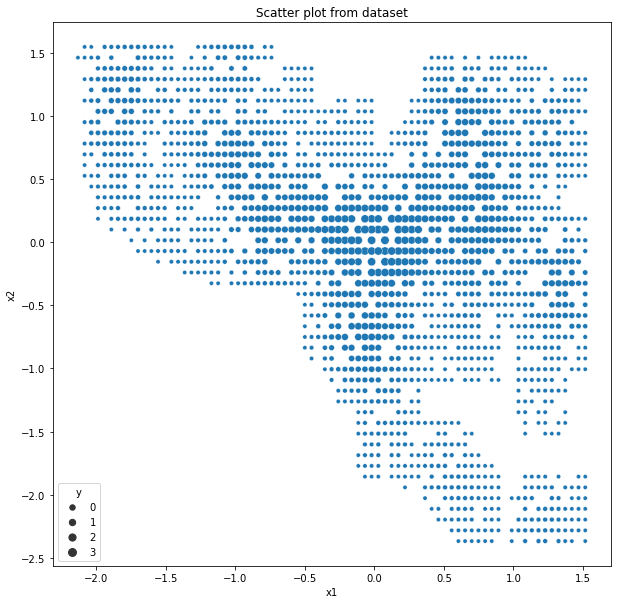

In [23]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title('Scatter plot from dataset')
sns.scatterplot(data=df,x='x1',y='x2',size='y',ax=ax)
plt.show()

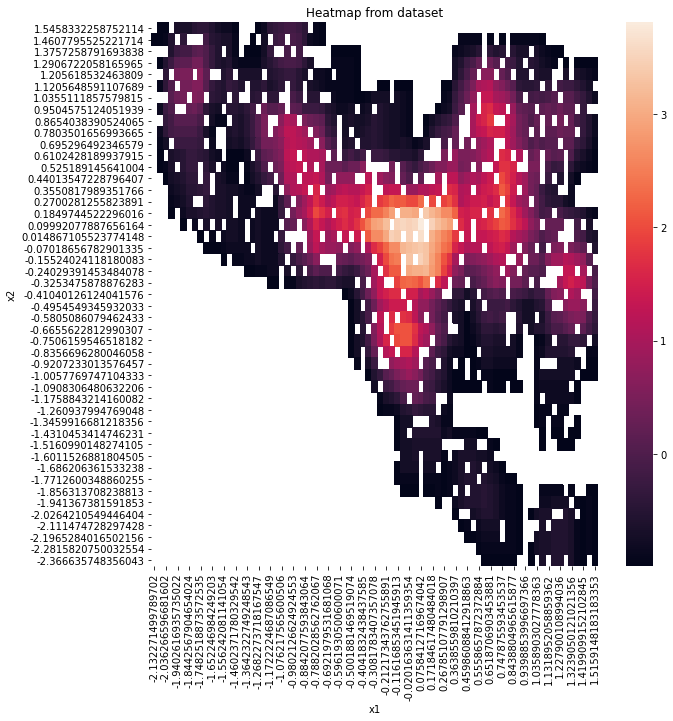

In [24]:
fig,ax = plt.subplots(figsize=(10,10))
df_hm = df.pivot('x2','x1','y')
df_hm = df_hm.sort_index(axis=0,ascending=False)
ax.set_title('Heatmap from dataset')
sns.heatmap(df_hm,ax=ax)
plt.show()

# Creating model

In [25]:
X = df[['x1','x2']].to_numpy()
y = df['y'].to_numpy()
print(X.shape)
print(y.shape)

(1771, 2)
(1771,)


In [26]:
model = NeuralNetwork(num_perceptrons=[2,10,1])

In [27]:
model.W_list

[array([[ 0.18430674, -0.28372493,  0.12591352, -0.25300107, -0.29948154,
         -0.04463514, -0.18285863,  0.2805779 , -0.03444833, -0.05243878],
        [-0.14688688, -0.27200236,  0.15484776, -0.25601384, -0.12766242,
          0.18938148,  0.19030679,  0.16827969, -0.15394795, -0.18227601],
        [ 0.06538223, -0.01076086,  0.26581444, -0.27249723,  0.18320171,
          0.12661805,  0.07354673,  0.02401577,  0.24254876,  0.21611999]]),
 array([[ 0.27746676],
        [ 0.12386813],
        [-0.01158017],
        [ 0.29761527],
        [ 0.10340582],
        [ 0.08985952],
        [-0.2551999 ],
        [-0.12738724],
        [-0.03320336],
        [-0.24225824]])]

In [28]:
err = model.fit(X,y,1000)

Epoch 10, E = 0.23410829869441271, accuracy = 0
Epoch 20, E = 0.17820286806285998, accuracy = 0
Epoch 30, E = 0.1748204641993793, accuracy = 0
Epoch 40, E = 0.17533992806337606, accuracy = 0
Epoch 50, E = 0.17010082257085807, accuracy = 0
Epoch 60, E = 0.14440679628675143, accuracy = 0
Epoch 70, E = 0.1361625566295605, accuracy = 0
Epoch 80, E = 0.13408915305911273, accuracy = 0
Epoch 90, E = 0.13052955894103124, accuracy = 0
Epoch 100, E = 0.12801299604174732, accuracy = 0
Epoch 110, E = 0.12503321121497465, accuracy = 0
Epoch 120, E = 0.12361325348353978, accuracy = 0
Epoch 130, E = 0.12247256408615495, accuracy = 0
Epoch 140, E = 0.11884368076826939, accuracy = 0
Epoch 150, E = 0.11487194260766749, accuracy = 0
Epoch 160, E = 0.11235369882391368, accuracy = 0
Epoch 170, E = 0.11194488490389594, accuracy = 0
Epoch 180, E = 0.11179298894559589, accuracy = 0
Epoch 190, E = 0.10945418698833036, accuracy = 0
Epoch 200, E = 0.11058690341943625, accuracy = 0
Epoch 210, E = 0.11167861308232

In [29]:
X[1]

array([-0.7402004 ,  0.78035017])

In [30]:
y[1]

0.3333783335106777

In [31]:
temp = X[1].reshape(1,2)
model.predict(temp)

array([[0.46512226]])

In [32]:
model.W_list

[array([[ -6.1836528 ,  12.73388204,  -1.79937319,   3.39225896,
           5.16289922,  -7.95370605,  -2.32706716,   2.03948944,
          -1.5199946 ,  -0.99262988],
        [  3.91569564,   5.3817494 ,   1.01173301,  -2.42991631,
          10.46545045,  -4.89182708,   5.11418128,  -5.12452448,
          -6.61532845,  -9.03355436],
        [  4.19470563,  -9.33320226,  -3.26921176,  -6.84219523,
          -4.41230634,  -6.23288018,  -2.39149336,  -3.42945811,
         -10.1794908 ,  -1.95740751]]),
 array([[ 3.09189071],
        [ 1.09192969],
        [ 1.8093874 ],
        [-1.48392191],
        [-1.74990098],
        [-1.82640373],
        [-2.8942906 ],
        [ 1.92108152],
        [ 1.44797345],
        [-2.55687443]])]